# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
!pip install sobol_seq 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import sobol_seq
import seaborn as sns
from numpy import linalg as LA
from math import pi

plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [0]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """

    V = pi**(D/2) / sp.gamma(1 + D/2) * R**D
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

2D, difference with the formula:0.0
3D, difference with the formula:-7.105427357601002e-15


Text(0, 0.5, 'V(D)')

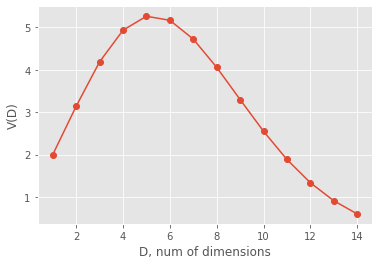

In [4]:
R = 2
# check for 2D & 3D 
print('2D, difference with the formula:{}'.
      format(pi * R**2 - getSphereVolumeExact(2, R))) #formula: pi*R^2
print('3D, difference with the formula:{}'.
      format(4/3 * pi * R**3 - getSphereVolumeExact(3, R))) #formula: 4/3*pi*R^3

plt.figure()
D_list = [getSphereVolumeExact(D) for D in range(1, 15)]
plt.plot(range(1, 15), D_list, '-o')
plt.xlabel('D, num of dimensions')
plt.ylabel('V(D)')

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [0]:
def getSphereVolumePseudorandom(N, D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    dots = np.random.uniform(-R, R, (D, N))
    r = np.array([LA.norm(dots.T[i]) for i in range(dots.shape[1])])
    inside = (r < R).astype(int)
    V = (2*R)**D * np.mean(inside)
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

Text(0.5, 0, 'D, num of dimensions')

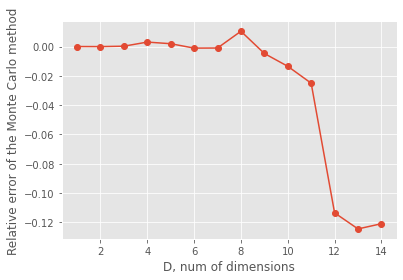

In [6]:
plt.figure()
eps = []
MC = []
N = 1000000
for D in range(1, 15):
    exact = getSphereVolumeExact(D, R=2)
    eps.append((exact - getSphereVolumePseudorandom(N, D, R=2)) / exact)
plt.plot(range(1, 15), eps, '-o')
plt.ylabel('Relative error of the Monte Carlo method')
plt.xlabel('D, num of dimensions')

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [0]:
sobol_seq.i4_sobol_generate?

In [0]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    random = np.array(sobol_seq.i4_sobol_generate(D, N))
    dots = (random - 0.5) * 2 * R
    r = np.array([LA.norm(dots[i]) for i in range(dots.shape[0])])
    inside = (r < R).astype(int)
    V = (2 * R) ** D * np.mean(inside)
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

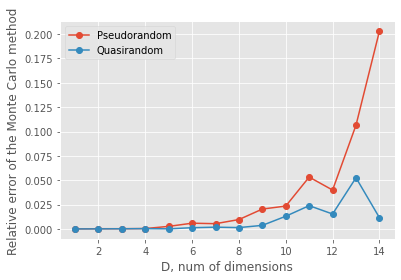

In [8]:
plt.figure()
eps_P = []
eps_Q = []
N = 1000000
for D in range(1, 15):
    exact = getSphereVolumeExact(D, R=2)
    eps_P.append(abs(exact - getSphereVolumePseudorandom(N, D, R=2)) / exact)
    eps_Q.append(abs(exact - getSphereVolumeQuasirandom(N, D, R=2)) / exact)
plt.plot(range(1, 15), eps_P, '-o', label='Pseudorandom')
plt.plot(range(1, 15), eps_Q, '-o', label='Quasirandom')
plt.ylabel('Relative error of the Monte Carlo method')
plt.xlabel('D, num of dimensions')
plt.legend()

Видно, что при больших размерностях ошибка увеличивается + метод Монте-Карло точнее работает на квазислучайной последовательности. Посмотрим в увеличенном масштабе, что происходит при $D < 10$.

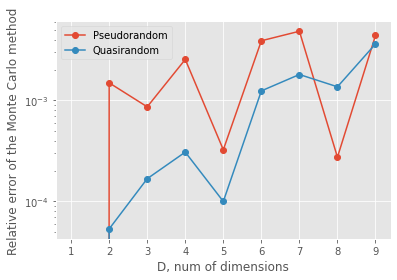

In [19]:
plt.figure()
eps_P = []
eps_Q = []
N = 1000000
for D in range(1, 10):
    exact = getSphereVolumeExact(D, R=2)
    eps_P.append(abs(exact - getSphereVolumePseudorandom(N, D, R=2)) / exact)
    eps_Q.append(abs(exact - getSphereVolumeQuasirandom(N, D, R=2)) / exact)
plt.plot(range(1, 10), eps_P, '-o', label='Pseudorandom')
plt.plot(range(1, 10), eps_Q, '-o', label='Quasirandom')
plt.yscale('log')
plt.ylabel('Relative error of the Monte Carlo method')
plt.xlabel('D, num of dimensions')
plt.legend()

**Про псевдо- и квазислучайные последовательности:** квазислучайная последовательность точек, сгенерированных внутри ограниченного объёма, более равномерно заполняет пространство (точки реже накладываются друг на друга) по сравнению с псевдослучайной последовательностью. Поэтому на квазислучайной последовательности метод Монте-Карло работает *немного точнее.*

Классная визуализация случайных последовательностей в начале поста по ссылке: https://habr.com/ru/post/440892/

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [0]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    np.random.seed(12345)
    state = np.random.randint(-1, 1, size=(N, N))
    state[state > -1] = 1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [0]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0] - 1
    row_up = i+1
    col_right = j+1
    if i == N: row_up = 0 # i+1 -> 0
    if j == N: col_right = 0 # j+1 -> 0
    initial_energy = -state[i, j] * (state[i, j-1] + state[i, col_right]
                                 + state[i-1, j] + state[row_up, j])
    new_energy = -1 * initial_energy
    dE = new_energy - initial_energy
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [0]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.

    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    for _ in range(N ** 2):
        i, j = np.random.randint(0, N, 2)
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i, j] *= -1
        elif np.random.rand() < np.exp(-dE / T):
            state[i, j] *= -1
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [0]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            row_up = i + 1
            col_right = j + 1
            if i == N - 1: row_up = 0  # i+1 -> 0
            if j == N - 1: col_right = 0  # j+1 -> 0
            energy = -state[i, j] * (state[i, j - 1] + state[i, col_right]
                                     + state[i - 1, j] + state[row_up, j])
            E += energy
    return E/2 # в цикле по каждой ячейке энергия взаимодействия соседей была учтена дважды

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [0]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [0]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

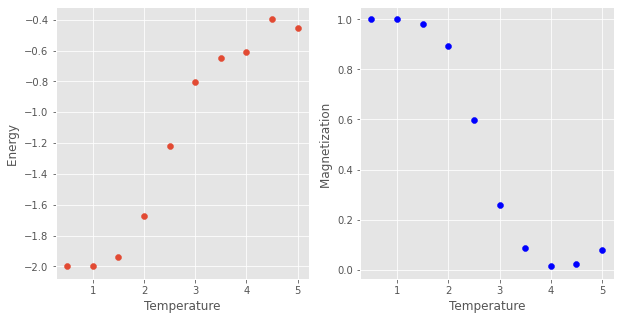

In [16]:
for t in range(Nt):
    #print("Complete", t/Nt*100, '%\r')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

#print("Done              \r")

_, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature")
ax[0].set_ylabel("Energy ")

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature")
ax[1].set_ylabel("Magnetization ")
plt.show()

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

На графиках видно, что с увеличением температуры энергия системы увеличивается (что естественно ожидается).

При маленькой темепратуре система обладает намагниченностью, которая с ростом температуры практически пропадает. Это соответствует *поведению ферромагнетика*, вещества, которое при определённой температуре (температуре ниже критической) *способно обладать намагниченностью в отсутствии внешнего магнитного поля*.

Строго говоря, фазовый переход второго рода - это скачкообразное изменение параметра системы, которое возможно при стремлении числа частиц к бесконечности. В нашем случае число частиц конечно, поэтому на графике изменения намагниченности вместо скачка имеет место довольно резкое, но всё же постепенное изменение параметра. Процесс приближённо можно считать фазовым переходом "ферромагнетик — парамагнетик". (источник: https://mipt.ru/upload/medialibrary/352/12_ishkhanyan_117_123.pdf)

Задайте новое состояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое.

In [0]:
N = 64
state = getInitialState(N)

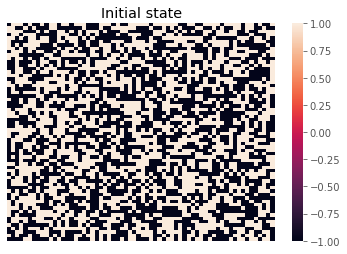

In [0]:
sns.heatmap(state, xticklabels=False, yticklabels=False)
plt.title('Initial state')
plt.show()

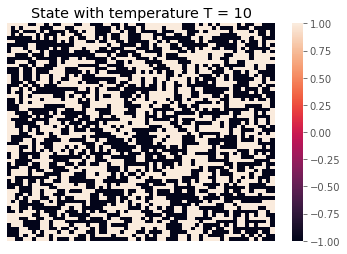

In [0]:
T = 10
for i in range(eqSteps):
  makeFlip(T, state)
sns.heatmap(state, xticklabels=False, yticklabels=False)
plt.title('State with temperature T = 10')
plt.show()

При высокой температуре (выше критической) спины в системе разупорядочены, система не обладает намагниченностью.

Energy: -7812.0, T = 0.5
Energy: -7764.0, T = 0.1
Energy: -7764.0, T = 0.01


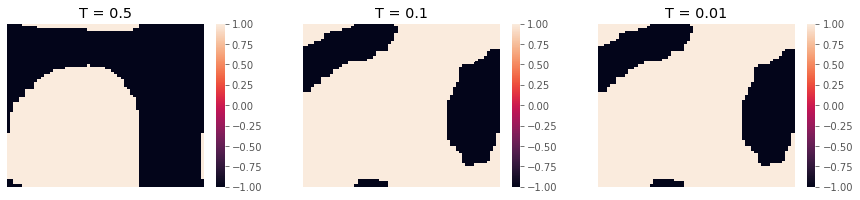

In [0]:
_, ax = plt.subplots(1,3, figsize=(15,3))

state = getInitialState(N) # обновим состояние
T = 0.5
for i in range(eqSteps):
  makeFlip(T, state)
sns.heatmap(state, xticklabels=False, yticklabels=False, ax=ax[0])
ax[0].set_title('T = 0.5')
print('Energy: {0}, T = {1}'.format(getEnergy(state), T))

state = getInitialState(N)
T = 0.1
for i in range(eqSteps):
  makeFlip(T, state)
sns.heatmap(state, xticklabels=False, yticklabels=False, ax=ax[1])
ax[1].set_title('T = 0.1')
print('Energy: {0}, T = {1}'.format(getEnergy(state), T))

state = getInitialState(N)
T = 0.01
for i in range(eqSteps):
  makeFlip(T, state)
sns.heatmap(state, xticklabels=False, yticklabels=False, ax=ax[2])
ax[2].set_title('T = 0.01')
print('Energy: {0}, T = {1}'.format(getEnergy(state), T))

plt.show()



При достаточно низких температурах наблюдается чёткое зонирование системы на участки "спины вверх" и "спины вниз". Системы обладает намагниченностью в отсутвие внешнего поля.